In [ ]:
%matplotlib inline
import re
import os
import string
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from nltk.corpus import stopwords
from sklearn.cluster import KMeans
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import linear_model
import sklearn.metrics as metrics
from sklearn.linear_model import MultiTaskLasso, Lasso
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
from sklearn import metrics

In [ ]:
import warnings
warnings.filterwarnings('ignore') #Execute this block of code only if you wish to avoid warnings in the output.

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%load_ext google.colab.data_table
bow: pd.DataFrame = pd.read_json("/content/drive/MyDrive/G5 Inter-Promo 2021/Données/Input/g3_BOW_v1.json")
bow.drop(["art_id", "art_content_clean_without_lem"], axis=1, inplace=True)
print(len(bow))
bow.head(3)

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table
7533


,abonnement,abord,aborde,aborder,abordes,aboutir,abri,absence,absolue,absolument,academie,academique,academiques,acceder,accelerateur,acceleration,accelere,acceleree,accelerer,accent,accentuer,acceptable,accepte,accepter,acces,accessibilite,accessible,accessibles,accident,accidents,accompagnant,accompagne,accompagnee,accompagnement,accompagnent,accompagner,accompagnes,accompli,accomplir,accord,...,volets,volontaire,volontaires,volontariste,volonte,volume,volumes,vont,vote,votee,voter,votes,voudrais,voulais,voulez,vouloir,voulons,voulu,voyage,voyez,voyons,vrai,vraie,vraies,vraiment,vrais,vu,vue,vues,vulnerables,web,week,www,xxie,yeux,yves,zero,zone,zones,œuvre
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2


In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth

ms:MeanShift = MeanShift(bandwidth = 2)

ms.fit(bow)
pr = ms.predict(bow)
print(len(pr))


10000


In [ ]:
#compte le nombre d'articles par cluster
nb=0
for i in set(pr):
  for j in pr:
    if i==j:
      nb+=1
  print('cluster ',i,':',nb)
  nb=0

cluster  0 : 10000


number of estimated clusters : 7456


NameError: ignored

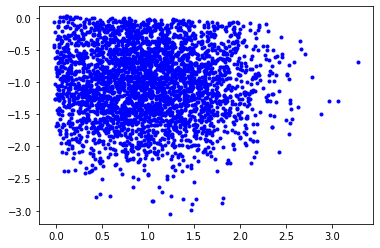

In [ ]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs

n_clusters_ = len(set(pr))

# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
bow, _ = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)

# #############################################################################
# Compute clustering with MeanShift

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(bow, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(bow)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
#n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
   # cluster_center = cluster_centers[k]
    plt.plot(bow[my_members, 0], bow[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [ ]:
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.graph_objects as go

def graph_3d(data: pd.DataFrame, prediction: pd.Series, name: dict=None, axes: tuple=(0,1,2), opacity: dict=None):
    """Documentation
    Parameters:
        data : the data that will be show on the plot
        prediction : the prediction that will be used to make distinction bewteen the differents class on the plot
        name : clusters names (ex: {prediction_value: name})
        axes : axes of pca to display points
        opacity : the transparency of the points  on the graph for each cluster (ex : {prediction_value: name}
    """

    if opacity is None:
        opacity: dict = {val:1 for val in set(prediction)}
    print(opacity)
    if name is None:
        name: dict = {val:str(val) for val in set(prediction)}

    sc: StandardScaler = StandardScaler()
    X: np.ndarray = sc.fit_transform(data)

    pca: PCA = PCA(n_components=10) # ACP très rapide 
    # pca = TSNE(n_components=3) # TSNE Très très long
    X: np.ndarray = pca.fit_transform(X)

    data_plot: pd.DataFrame = pd.DataFrame(X)
    data_plot["prediction"] = prediction
    # data_plot["prediction"] = prediction.replace([-1,1], name)

    data: list = []
    for val in set(prediction):
        data_semi_plot: pd.DataFrame = data_plot[data_plot["prediction"] == val]
        data.append(go.Scatter3d(x=data_semi_plot[axes[0]], y=data_semi_plot[axes[1]], z=data_semi_plot[axes[2]], name=name[val], mode='markers',marker=dict(size=6), opacity=opacity[val]))

    fig: go.Figure = go.Figure(data)
    fig.show()

In [ ]:
graph_3d(bow,pr)

In [ ]:
#print(pr)
#print(bow)